# produce the figures/numbers for the cosmic rejection paper

In [3]:
import sys; sys.path.insert(0, '../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
import seaborn as sns;sns.set(style="white", color_codes=True ,font_scale=2);
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [4]:
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
_,OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
print "%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay'

283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%
95259 cosmic pairs and 49707 mu-p pairs in overlay


# apply the cuts in order to
    1 select the optimal ones, and
    2 study the cut sensitivity

In [5]:
pair_types   = ['1mu-1p'   ,'other pairs','cosmic' ,'CC 1p 0pi'    ]
MClabels     = ['1$\\mu$1p','other pairs','cosmic' ,'CC 1p 0$\\pi$']
MCcolors     = ['teal'     ,'red'        ,'orange' ,'blue'         ]
MCcmaps      = ['Greens'   ,'Reds'       ,'Oranges','Blues'        ]

In [6]:
# def check_cuts(PIDa_p_min=13
#     ,minPEcut = 100
#     ,maxdYZcut = 200                              
#     ,delta_theta_12=55  # deg.
#     ,opt_box=(50,100) # [Nwires x Nticks]
#     ,r_max_RdQ_CC1p0pi = 0.35 # sphere in U,V,Y space, apply a cut only to CC1p0pi
#     # --- -- --- - -- -- --- --
#     ,delta_Delta_phi=35 # deg.
#     ,Pt_max=0.35        # GeV/c
#     ):
    
#     reduced_MCbnbDATAcosmic = dict()
#     pureff_MCbnbDATAcosmic = pd.DataFrame()
#     pureff_MCbnbDATAcosmic_numbers = pd.DataFrame()

#     for pair_type in pair_types:#{
#         reduced_MCbnbDATAcosmic[pair_type] = MCbnbDATAcosmicSamples[pair_type]
#     #}
#     reduced_MCbnbDATAcosmicSamples['no cut'] = reduced_MCbnbDATAcosmic

#     # before cuts
#     reduced_MCbnbDATAcosmic = dict()
#     for pair_type in pair_types:#{
#         sam = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
#         reduced_MCbnbDATAcosmic[pair_type] = sam
#     #}
#     reduced_MCbnbDATAcosmicSamples['no cut'] = reduced_MCbnbDATAcosmic
#     pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name = 'no cut', cut_label='no cut', reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)


#     # cut 1: PIDa
#     # -- -- -- -- -- ---- - ---- 
#     cut_name , cut_label = 'PIDa','${PID}_a>%.0f$'%PIDa_p_min
#     reduced_MCbnbDATAcosmic = dict()
#     for pair_type in pair_types:#{
#         sam = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
#         reduced_MCbnbDATAcosmic[pair_type] = sam[sam['PIDa_assigned_proton']>PIDa_p_min]
#     #}
#     reduced_MCbnbDATAcosmicSamples['PIDa'] = reduced_MCbnbDATAcosmic
#     pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)


#     # cut 2: Optical filtering
#     # -- -- -- -- -- ---- - ---- 
#     cut_name , cut_label = 'flash', 'optical filter'
#     reduced_MCbnbDATAcosmic = dict()
#     for pair_type in pair_types:#{
#         sam = reduced_MCbnbDATAcosmicSamples['PIDa'][pair_type]
#         reduced_MCbnbDATAcosmic[pair_type] = sam[(sam['ClosestFlash_TotalPE'] > minPEcut)
#                                                      &(sam['ClosestFlash_YZdistance'] < maxdYZcut)]
#     #}
#     reduced_MCbnbDATAcosmicSamples['flash'] = reduced_MCbnbDATAcosmic
#     pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name=cut_name,cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)


#     # cut 3: require that the longer track is the one with larger PIDa
#     # -- -- -- -- -- ---- - ---- 
#     cut_name , cut_label = 'length', r'$l_{\mu}>l_{p}$'
#     reduced_MCbnbDATAcosmic = dict()
#     for pair_type in pair_types:#{
#         sam = reduced_MCbnbDATAcosmicSamples['flash'][pair_type]
#         reduced_MCbnbDATAcosmic[pair_type] = sam[sam['l_muCandidate'] > sam['l_pCandidate']]
#     #}
#     reduced_MCbnbDATAcosmicSamples['length'] = reduced_MCbnbDATAcosmic
#     pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)

#     # cut 4: theta_{12}
#     # -- -- -- -- -- ---- - ---- 
#     cut_name, cut_label='non-collinearity' ,'$|\theta_{1,2}-90^0|<%.0f^0$'%delta_theta_12
#     reduced_MCbnbDATAcosmic = dict()
#     for pair_type in pair_types:#{
#         sam = reduced_MCbnbDATAcosmicSamples['length'][pair_type]
#         reduced_MCbnbDATAcosmic[pair_type] = sam[np.abs(sam['theta_12']-90)<delta_theta_12]
#     #}
#     reduced_MCbnbDATAcosmicSamples['non-collinearity'] = reduced_MCbnbDATAcosmic
#     pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)


#     # cut 5: vertex activity (RdQ)
#     # -- -- -- -- -- ---- - ---- 
#     cut_name , cut_label = 'vertex activity' , '$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<%.2f$'%r_max_RdQ_CC1p0pi
#     box_str='[%d wires x %d ticks]'%(opt_box[0],opt_box[1])
#     Ru,Rv,Ry = 'RdQaroundVertex[plane 0]'+box_str,'RdQaroundVertex[plane 1]'+box_str,'RdQaroundVertex[plane 2]'+box_str
#     reduced_MCbnbDATAcosmic = dict()
#     for pair_type in pair_types:#{         
#         sam = reduced_MCbnbDATAcosmicSamples['non-collinearity'][pair_type]
#         sam = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
#                       | 
#                       (np.sqrt( np.square(sam[Ru]-1) + np.square(sam[Rv]-1) + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]
#         reduced_MCbnbDATAcosmic[pair_type] = sam        
#     #}
#     reduced_MCbnbDATAcosmicSamples['vertex activity'] = reduced_MCbnbDATAcosmic
#     pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name=cut_name ,cut_label=cut_label , reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)

#     # cut 6: delta phi
#     reduced_MCbnbDATAcosmic = dict()
#     for pair_type in pair_types:#{
#         sam = reduced_MCbnbDATAcosmicSamples['vertex activity'][pair_type]
#         reduced_MCbnbDATAcosmic[pair_type] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]
#     #}
#     reduced_MCbnbDATAcosmicSamples['delta phi'] = reduced_MCbnbDATAcosmic
#     pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name = 'delta phi', cut_label='$|\Delta \phi - \pi|<%.0f^0$'%delta_Delta_phi, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)

#     # cut 6.5: Pt<0.35 without application of the $\Delta phi$ cut
#     reduced_MCbnbDATAcosmic = dict()
#     for pair_type in pair_types:#{
#         sam = reduced_MCbnbDATAcosmicSamples['vertex activity'][pair_type]
#         reduced_MCbnbDATAcosmic[pair_type] = sam[sam['reco_Pt']<Pt_max]
#     #}
#     reduced_MCbnbDATAcosmicSamples['Pt No Delta phi'] = reduced_MCbnbDATAcosmic
#     pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name='Pt no Delta phi', cut_label='$p_{t}<%.2f$ GeV/c'%Pt_max, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)


#     # cut 7: Pt<0.35
#     reduced_MCbnbDATAcosmic = dict()
#     for pair_type in pair_types:#{
#         sam = reduced_MCbnbDATAcosmicSamples['delta phi'][pair_type]
#         reduced_MCbnbDATAcosmic[pair_type] = sam[sam['reco_Pt']<Pt_max]
#     #}
#     reduced_MCbnbDATAcosmicSamples['soft Pt'] = reduced_MCbnbDATAcosmic
#     pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name='soft Pt', cut_label='$p_{t}<%.2f$ GeV/c'%Pt_max, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)

#     return pureff_MCbnbDATAcosmic

In [28]:
reducedSamples,pureffOverlay,numbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                          ,cuts_order = ['no cut','Chi2Proton','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt no delta phi','Pt & delta phi']
                                          ,Chi2Proton_muCandidate_min=80
                                          ,Chi2Proton_pCandidate_max=30
                                          ,minPEcut = 150
                                          ,maxdYZcut = 200
                                          ,delta_theta_12=55  # deg.
                                          ,r_max_RdQ_CC1p0pi = 0.39 # sphere in U,V,Y space, apply a cut only to CC1p0pi
                                          ,delta_Delta_phi=35 # deg.
                                          ,Pt_max=0.35        # GeV/c
)
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.7%,100.0%,12.9%,no cut,100.0% (49707),100.0% (41519),100.0% (95259),100.0% (23996)
Chi2Proton,63.1%,70.7%,68.7%,37.1%,Chi2Proton,63.1% (31389),19.3% (8021),5.2% (5001),68.7% (16481)
MatchedFlash,51.6%,78.1%,56.3%,41.2%,MatchedFlash,51.6% (25634),13.2% (5491),1.8% (1688),56.3% (13510)
length,47.2%,83.5%,52.5%,44.8%,length,47.2% (23459),7.9% (3281),1.4% (1369),52.5% (12600)
non-collinearity,43.1%,87.4%,49.7%,48.7%,non-collinearity,43.1% (21412),5.8% (2409),0.7% (673),49.7% (11926)
vertex activity,31.0%,89.1%,44.2%,61.5%,vertex activity,31.0% (15391),3.7% (1538),0.4% (346),44.2% (10616)
delta phi,20.6%,95.3%,33.7%,75.2%,delta phi,20.6% (10241),0.9% (382),0.1% (118),33.7% (8080)
Pt no delta phi,23.3%,92.4%,36.0%,69.0%,Pt no delta phi,23.3% (11582),1.8% (767),0.2% (185),36.0% (8646)
Pt & delta phi,18.2%,96.3%,30.4%,77.8%,Pt & delta phi,18.2% (9035),0.7% (270),0.1% (79),30.4% (7304)


# sensitivity to the cuts using a Gaussian sampling

In [43]:
Nrand = 1000
opt_box=(50,100)
box_str='[%d wires x %d ticks]'%(opt_box[0],opt_box[1])
Ru,Rv,Ry = 'RdQaroundVertex[plane 0]'+box_str,'RdQaroundVertex[plane 1]'+box_str,'RdQaroundVertex[plane 2]'+box_str

Ncosmic_det,fcosmic_det,NCC1p0pi_det,fCC1p0pi_det=[],[],[],[]
Ncosmic_all,fcosmic_all,NCC1p0pi_all,fCC1p0pi_all=[],[],[],[]

for irand in range(Nrand):
    if irand%(Nrand/10)==0: print '%.1f'%(100.*float(irand)/Nrand)+'%'
    Chi2Proton_muCandidate_min = np.random.normal( 80 , 10)
    Chi2Proton_pCandidate_max = np.random.normal( 30 , 5)
    minPEcut = np.random.normal( 150 , 15)
    maxdYZcut = np.random.normal( 200 , 50)
    delta_theta_12 = np.random.normal( 55 , 5 )
    r_max_RdQ_CC1p0pi = np.random.normal( 0.39 , 0.05 )
    delta_Delta_phi = np.random.normal( 35 , 5 )
    Pt_max = np.random.normal( 0.35 , 0.05 )
    
    # detector cuts
    reducedOverlay = dict()
    for pair_type in pair_types:#{
        sam = reducedSamples['no cut'][pair_type]
        reducedOverlay[pair_type] = sam[ (sam['pidcali_Chi2ProtonYplane_muCandidate']>Chi2Proton_muCandidate_min)
                                                 &(sam['pidcali_Chi2ProtonYplane_pCandidate']>0)
                                                 &(sam['pidcali_Chi2ProtonYplane_pCandidate']<Chi2Proton_pCandidate_max)
                                                 &(sam['MatchedFlash_TotalPE'] > minPEcut)
                                                 &(sam['MatchedFlash_YZdistance'] < maxdYZcut)
                                                 &(sam['l_muCandidate'] > sam['l_pCandidate'])
                                                 &(np.abs(sam['theta_12']-90)<delta_theta_12)
                                                 &((sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1)
                                                   | (np.sqrt( np.square(sam[Ru]-1) + np.square(sam[Rv]-1) + np.square(sam[Ry]-1) )
                                                      <= r_max_RdQ_CC1p0pi))]
    #}
    Ncosmic_det.append(len(reducedOverlay['cosmic']))
    fcosmic_det.append(100.*float(Ncosmic_det[-1])/len(reducedSamples['no cut']['cosmic']))
    NCC1p0pi_det.append(len(reducedOverlay['CC 1p 0pi']))
    fCC1p0pi_det.append(100.*float(NCC1p0pi_det[-1])/len(reducedSamples['no cut']['CC 1p 0pi']))

    # all cuts
    reducedOverlay = dict()
    for pair_type in pair_types:#{
        sam = reducedSamples['no cut'][pair_type]
        reducedOverlay[pair_type] = sam[(sam['pidcali_Chi2ProtonYplane_muCandidate']>Chi2Proton_muCandidate_min)
                                                 &(sam['pidcali_Chi2ProtonYplane_pCandidate']>0)
                                                 &(sam['pidcali_Chi2ProtonYplane_pCandidate']<Chi2Proton_pCandidate_max)
                                                 &(sam['MatchedFlash_TotalPE'] > minPEcut)
                                                 &(sam['MatchedFlash_YZdistance'] < maxdYZcut)
                                                 &(sam['l_muCandidate'] > sam['l_pCandidate'])
                                                 &(np.abs(sam['theta_12']-90)<delta_theta_12)
                                                 &((sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1)
                                                   | (np.sqrt( np.square(sam[Ru]-1) + np.square(sam[Rv]-1) + np.square(sam[Ry]-1) )
                                                      <= r_max_RdQ_CC1p0pi))
                                                 &(np.abs(sam['delta_phi']-180.)<delta_Delta_phi)
                                                 &(sam['reco_Pt']<Pt_max)]
    #}
    Ncosmic_all.append(len(reducedOverlay['cosmic']))
    fcosmic_all.append(100.*float(Ncosmic_all[-1])/len(reducedSamples['no cut']['cosmic']))
    NCC1p0pi_all.append(len(reducedOverlay['CC 1p 0pi']))
    fCC1p0pi_all.append(100.*float(NCC1p0pi_all[-1])/len(reducedSamples['no cut']['CC 1p 0pi']))
            
print 'done.'

0.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
done.


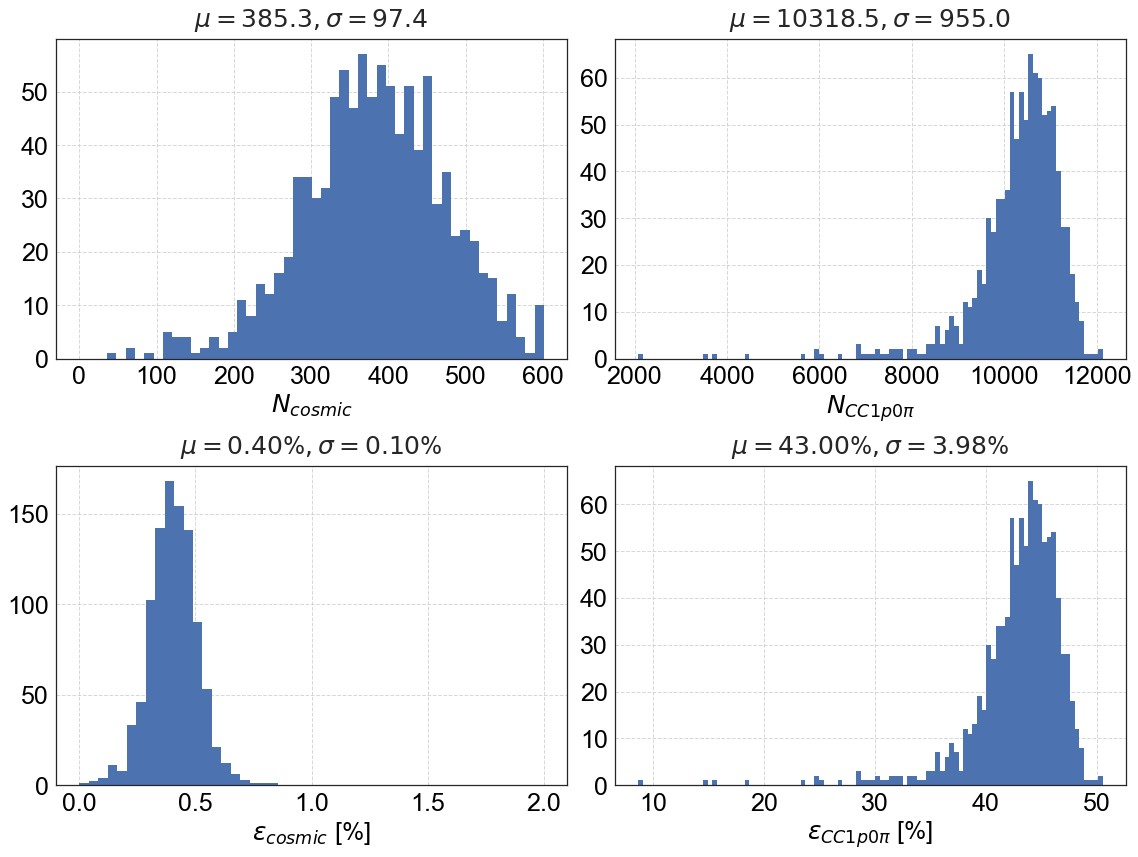

In [44]:
fig = plt.figure(figsize=(16,12))

ax=fig.add_subplot(2,2,1)
plt.hist(Ncosmic_det,bins=np.linspace(0,601,51))
mean,std=np.mean(Ncosmic_det),np.std(Ncosmic_det)
set_axes(ax,r'$N_{cosmic}$',do_add_grid=True,title=r'$\mu=%.1f,\sigma=%.1f$'%(mean,std))

ax=fig.add_subplot(2,2,2)
plt.hist(NCC1p0pi_det,bins=100)
mean,std=np.mean(NCC1p0pi_det),np.std(NCC1p0pi_det)
set_axes(ax,r'$N_{CC1p0\pi}$',do_add_grid=True,title=r'$\mu=%.1f,\sigma=%.1f$'%(mean,std))

ax=fig.add_subplot(2,2,3)
plt.hist(fcosmic_det,bins=np.linspace(0,2,50))
mean,std=np.mean(fcosmic_det),np.std(fcosmic_det)
set_axes(ax,r'$\epsilon_{cosmic}$ [%]',do_add_grid=True,title=(r'$\mu=%.2f$'%mean+'%'+r'$,\sigma=%.2f$'%std+'%'))

ax=fig.add_subplot(2,2,4)
plt.hist(fCC1p0pi_det,bins=100)
mean,std=np.mean(fCC1p0pi_det),np.std(fCC1p0pi_det)
set_axes(ax,r'$\epsilon_{CC1p0\pi}$ [%]',do_add_grid=True,title=(r'$\mu=%.2f$'%mean+'%'+r'$,\sigma=%.2f$'%std+'%'))


plt.tight_layout()

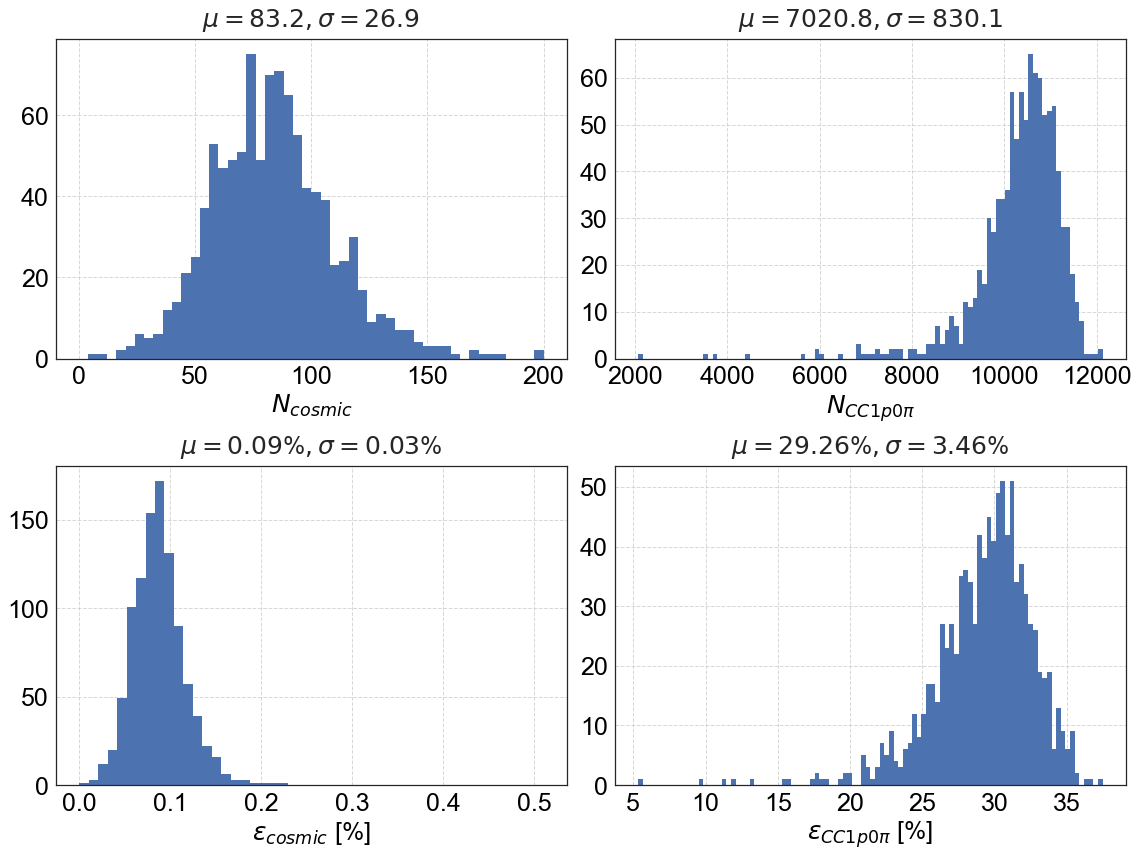

In [45]:
fig = plt.figure(figsize=(16,12))

ax=fig.add_subplot(2,2,1)
plt.hist(Ncosmic_all,bins=np.linspace(0,200,51))
mean,std=np.mean(Ncosmic_all),np.std(Ncosmic_all)
set_axes(ax,r'$N_{cosmic}$',do_add_grid=True,title=r'$\mu=%.1f,\sigma=%.1f$'%(mean,std))

ax=fig.add_subplot(2,2,2)
plt.hist(NCC1p0pi_det,bins=100)
mean,std=np.mean(NCC1p0pi_all),np.std(NCC1p0pi_all)
set_axes(ax,r'$N_{CC1p0\pi}$',do_add_grid=True,title=r'$\mu=%.1f,\sigma=%.1f$'%(mean,std))

ax=fig.add_subplot(2,2,3)
plt.hist(fcosmic_all,bins=np.linspace(0,0.51,50))
mean,std=np.mean(fcosmic_all),np.std(fcosmic_all)
set_axes(ax,r'$\epsilon_{cosmic}$ [%]',do_add_grid=True,title=(r'$\mu=%.2f$'%mean+'%'+r'$,\sigma=%.2f$'%std+'%'))

ax=fig.add_subplot(2,2,4)
plt.hist(fCC1p0pi_all,bins=100)
mean,std=np.mean(fCC1p0pi_all),np.std(fCC1p0pi_all)
set_axes(ax,r'$\epsilon_{CC1p0\pi}$ [%]',do_add_grid=True,title=(r'$\mu=%.2f$'%mean+'%'+r'$,\sigma=%.2f$'%std+'%'))


plt.tight_layout()

# Sensitivity when all (fixed) cut parameters are shifter together

In [ ]:
# cuts sensitivity
PIDa_p_min_minus = 11
PIDa_p_min_plus = 13
minPEcut_minus = 80
minPEcut_plus = 120
maxdYZcut_minus = 150
maxdYZcut_plus = 250
delta_theta_12_minus = 55 
delta_theta_12_plus = 65 
r_max_RdQ_CC1p0pi_minus = 0.3
r_max_RdQ_CC1p0pi_plus = 0.4
# --- -- --- - -- -- --- --
delta_Delta_phi_minus = 35
delta_Delta_phi_plus = 45
Pt_max_minus=0.3
Pt_max_plus=0.4
# --- -- --- - -- -- --- --

   
# -- -- - -- - -- - -- - -- - -- - -- - -- - --
# cut-sensitivity
# -- -- - -- - -- - -- - -- - -- - -- - -- - -- 
cut_name,cut_label  = 'detector cuts',r'detector cuts'
reduced_MCbnbDATAcosmic = dict()
for pair_type in pair_types:#{
    reduced_MCbnbDATAcosmic[pair_type] = reduced_MCbnbDATAcosmicSamples['vertex activity'][pair_type]
get_pureff_MCbnbDATAcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)


cut_name  = 'detector cuts all tight'
arguments = (PIDa_p_min_plus , minPEcut_plus , maxdYZcut_minus , delta_theta_12_minus , r_max_RdQ_CC1p0pi_minus)
cut_label = r'${PID}_a^p>%d, N_{PE}>%d, d_{YZ}<%d, |\theta_{1,2}-\frac{\pi}{2}|<%d^{0},r_{\Delta Q}<%.1f$'%arguments
reduced_MCbnbDATAcosmic = dict()
for pair_type in pair_types:#{
    sam = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
    reduced_MCbnbDATAcosmic[pair_type] = sam[(sam['PIDa_assigned_proton']>PIDa_p_min_plus)
                                             &(sam['ClosestFlash_TotalPE'] > minPEcut_plus)                                                
                                             &(sam['ClosestFlash_YZdistance'] < maxdYZcut_minus)
                                             &(sam['PIDa_long'] < sam['PIDa_short'])
                                             &(np.abs(sam['theta_12']-90)<delta_theta_12_minus)
                                             &((sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1)                                              
                                               | (np.sqrt( np.square(sam[Ru]-1) + np.square(sam[Rv]-1) + np.square(sam[Ry]-1) ) 
                                                <= r_max_RdQ_CC1p0pi_minus))]
#}
get_pureff_MCbnbDATAcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
get_pureff_MCbnbDATAcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)

cut_name  = 'detector cuts all relaxed'
arguments = (PIDa_p_min_minus , minPEcut_minus , maxdYZcut_plus , delta_theta_12_plus , r_max_RdQ_CC1p0pi_plus)
cut_label = r'${PID}_a^p>%d, N_{PE}>%d, d_{YZ}<%d, |\theta_{1,2}-\frac{\pi}{2}|<%d^{0},r_{\Delta Q}<%.1f$'%arguments
reduced_MCbnbDATAcosmic = dict()
for pair_type in pair_types:#{
    sam = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
    reduced_MCbnbDATAcosmic[pair_type] = sam[(sam['PIDa_assigned_proton']>PIDa_p_min_minus)
                                             &(sam['ClosestFlash_TotalPE'] > minPEcut_minus)                                                
                                             &(sam['ClosestFlash_YZdistance'] < maxdYZcut_plus)    
                                             &(sam['PIDa_long'] < sam['PIDa_short'])
                                             &(np.abs(sam['theta_12']-90)<delta_theta_12_plus)
                                             &((sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1)                                              
                                               | (np.sqrt( np.square(sam[Ru]-1) + np.square(sam[Rv]-1) + np.square(sam[Ry]-1) ) 
                                                <= r_max_RdQ_CC1p0pi_plus))]
#}
get_pureff_MCbnbDATAcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic=reduced_MCbnbDATAcosmic)
get_pureff_MCbnbDATAcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic=reduced_MCbnbDATAcosmic)



cut_name,cut_label  = 'all cuts',r'all cuts'
reduced_MCbnbDATAcosmic = dict()
for pair_type in pair_types:#{
    reduced_MCbnbDATAcosmic[pair_type] = reduced_MCbnbDATAcosmicSamples['soft Pt'][pair_type]
get_pureff_MCbnbDATAcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)


cut_name  = 'all cuts all tight'
arguments = (PIDa_p_min_plus , minPEcut_plus , maxdYZcut_minus , delta_theta_12_minus , r_max_RdQ_CC1p0pi_minus, delta_Delta_phi_minus,Pt_max_minus)
cut_label = r'all tight'
reduced_MCbnbDATAcosmic = dict()
for pair_type in pair_types:#{
    sam = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
    reduced_MCbnbDATAcosmic[pair_type] = sam[(sam['PIDa_assigned_proton']>PIDa_p_min_plus)
                                             &(sam['ClosestFlash_TotalPE'] > minPEcut_plus)                                                
                                             &(sam['ClosestFlash_YZdistance'] < maxdYZcut_minus)
                                             &(sam['PIDa_long'] < sam['PIDa_short'])
                                             &(np.abs(sam['theta_12']-90)<delta_theta_12_minus)
                                             &((sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1)                                              
                                               | (np.sqrt( np.square(sam[Ru]-1) + np.square(sam[Rv]-1) + np.square(sam[Ry]-1) ) 
                                                <= r_max_RdQ_CC1p0pi_minus))
                                             &(np.abs(sam['delta_phi']-180.)<delta_Delta_phi_minus)
                                             &(sam['reco_Pt']<Pt_max_minus)]
#}
get_pureff_MCbnbDATAcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
get_pureff_MCbnbDATAcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)





cut_name  = 'all cuts all relaxed'
arguments = (PIDa_p_min_minus , minPEcut_minus , maxdYZcut_plus , delta_theta_12_plus , r_max_RdQ_CC1p0pi_plus, delta_Delta_phi_plus,Pt_max_plus)
cut_label = r'all relaxed'
reduced_MCbnbDATAcosmic = dict()
for pair_type in pair_types:#{
    sam = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
    reduced_MCbnbDATAcosmic[pair_type] = sam[(sam['PIDa_assigned_proton']>PIDa_p_min_minus)
                                             &(sam['ClosestFlash_TotalPE'] > minPEcut_minus)                                                
                                             &(sam['ClosestFlash_YZdistance'] < maxdYZcut_plus)    
                                             &(sam['PIDa_long'] < sam['PIDa_short'])
                                             &(np.abs(sam['theta_12']-90)<delta_theta_12_plus)
                                             &((sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1)                                              
                                               | (np.sqrt( np.square(sam[Ru]-1) + np.square(sam[Rv]-1) + np.square(sam[Ry]-1) ) 
                                                <= r_max_RdQ_CC1p0pi_plus))
                                             &(np.abs(sam['delta_phi']-180.)<delta_Delta_phi_plus)
                                             &(sam['reco_Pt']<Pt_max_plus)]
#}
get_pureff_MCbnbDATAcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
get_pureff_MCbnbDATAcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)




